In [ ]:
Data Description:

The dataset consists of three columns and 100 rows which includes two feature columns and one label column.
Features columns are in the form of float and continuous values ranges from [-29.969271 to 29.957195] and [-29.999631 to 34.869783] and the means are at [0.061578 and 0.470548].
Whereas label is in the form discreate numerical float values that inclueds [0.0 and 1.o]. 50% of the data consists of 0 and rest consists of 1 as labels.
There are zero duplicates and no null values consists in the dataset.
Pattern that is formed by the input features is linear separatering. That means a liner line is separating 0 label and 1 label.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\chauh\Downloads\5.outlier.csv",header=None)

In [3]:
data.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [31]:
data.duplicated().sum()

0

In [32]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

In [33]:
data[2].value_counts()

0    300
1    300
Name: 2, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [34]:
data.describe()

,0,1,2
count,600.000000,600.000000,600.000000
mean,0.061578,0.470548,0.500000
std,21.233873,12.685787,0.500417
min,-29.969271,-29.999631,0.000000
25%,-21.243866,-7.736699,0.000000
50%,2.650017,-0.377631,0.500000
75%,20.820305,9.078000,1.000000
max,29.957195,34.869783,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[2],test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [11]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [22]:
model = Sequential()
model.add(Dense(8,activation="relu",input_dim=2))
model.add(Dense(6,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 18        
                                                                 
 dense_5 (Dense)             (None, 4)                 28        
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
history = model.fit(X_trains,y_train,epochs=50,batch_size=12,validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 2s 14ms/step - loss: 0.6915 - accuracy: 0.3333 - val_loss: 0.6890 - val_accuracy: 0.3646
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5026 - val_loss: 0.6878 - val_accuracy: 0.5104
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.5443 - val_loss: 0.6845 - val_accuracy: 0.5625
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5859 - val_loss: 0.6722 - val_accuracy: 0.6562
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.7552 - val_loss: 0.6278 - val_accuracy: 0.8958
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.9688 - val_loss: 0.5343 - val_accuracy: 0.9688
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.9844 - val_loss: 0.4274 - val_accuracy: 1.0000
Epoch 8/50
32/32 [=

In [16]:
from mlxtend.plotting import plot_decision_regions as pt

33750/33750 [==============================] - 60s 2ms/step


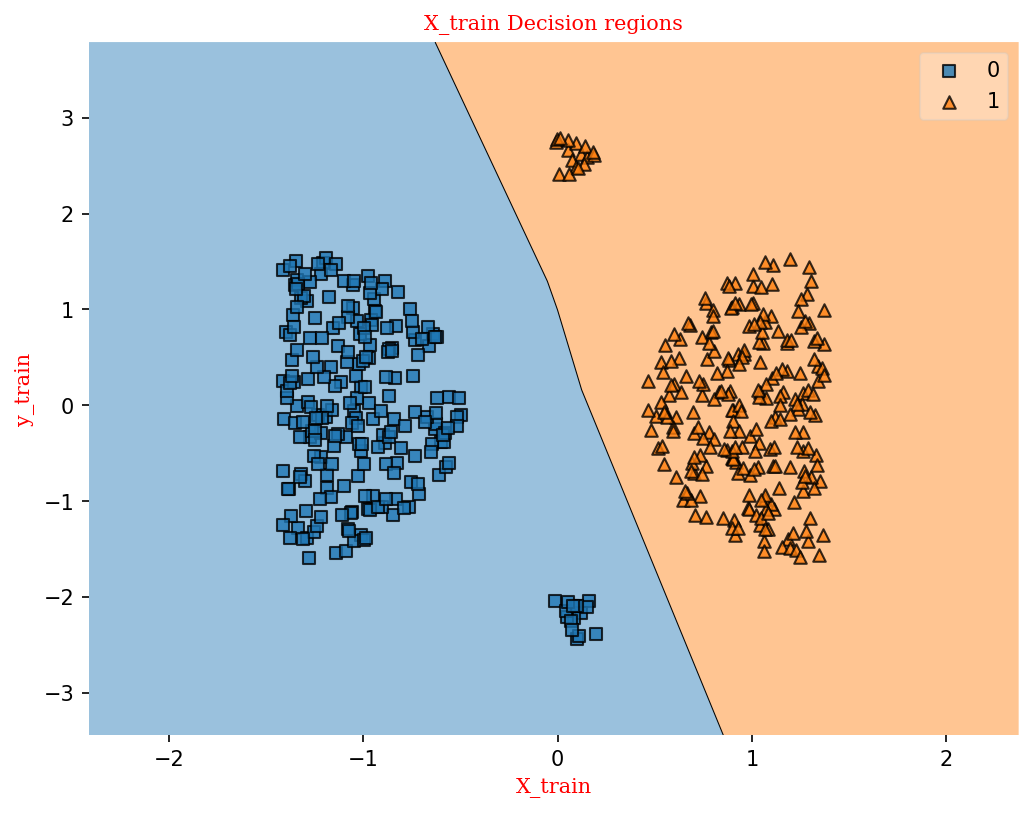

In [17]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_train",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_train",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [26]:
y_pred = model.predict(X_tests)

4/4 [==============================] - 0s 7ms/step


In [27]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0

33750/33750 [==============================] - 57s 2ms/step


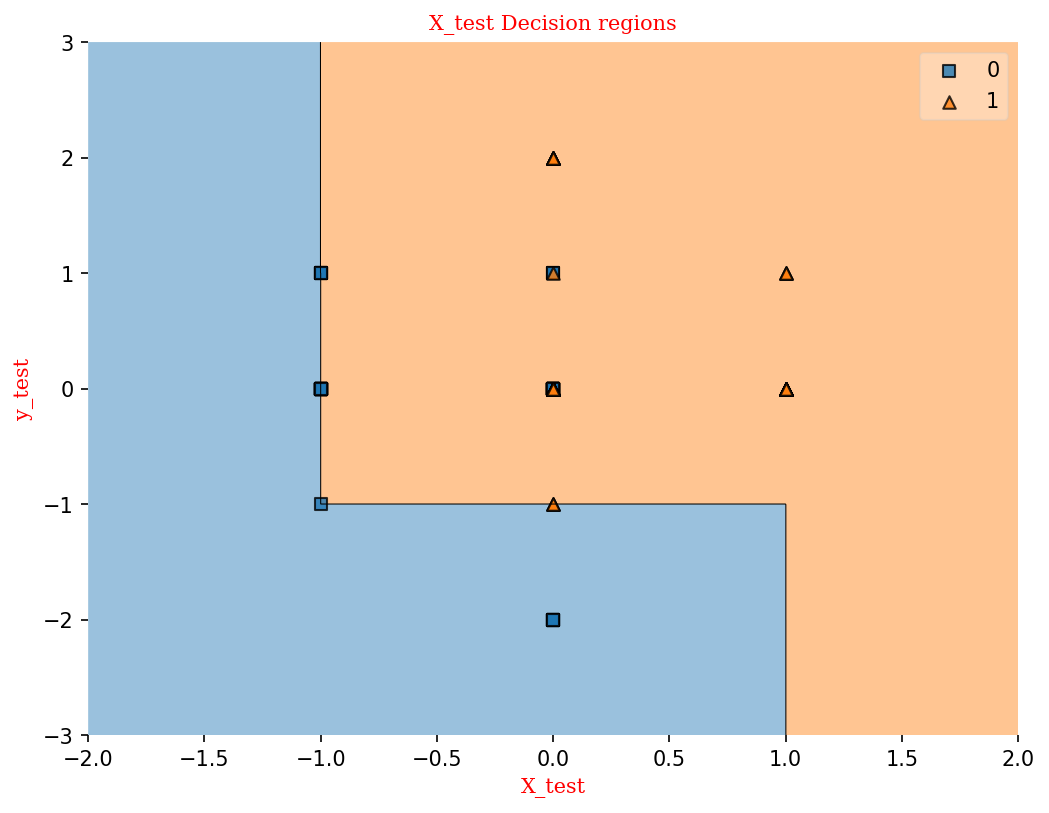

In [37]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_tests.astype(int),y_predf,clf=model)
plt.title("X_test Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_test",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_test",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0